<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-60/blob/main/Actividad%20Semanal%20--%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


🚀 **Actividad Semanal -- 4**: Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

📑 **Asignatura:** Ciencia y analítica de datos

📚 **Grupo:** 60

🧑 **Alumnos:** 
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

🧑 **Profesor**: Jobish Vallikavungal Devassia

📅 Octubre 10 del 2022

---

### **1era Parte:** Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos;

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

db = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

📖 Iniciamos creando nuestro dataframe a partir del set de datos con los clientes de Taiwan, y un backup por si debemos devolvernos al conjunto original:

In [3]:
dfCreditos = pd.read_csv(db)
dfCreditosBK = dfCreditos.copy()
dfCreditos.head()

ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]

---
🔎 Comenzamos preparando los datos, teniendo en cuenta que PCA es sensible al tipo de dato utilizado y a los valores faltantes, procederemos inicialmente a realizar una limpieza de datos faltantes:

---



In [4]:
dfCreditos.dropna(axis = 0, inplace=True)
dfCreditos.head()

ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]

---
🔎 Verificamos a través del método "**info**" las características de nuestro data frame, para determinar cuales variables son numéricas y cuales categóricas, con el fin de que podamos realizar transformaciones y utilizar PCA más adelante:

---

In [5]:
dfCreditos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

---
🔎 Seleccionamos solo los atributos numéricos que consideramos relevantes para las predicciones de nuestro modelo. En este caso solo excluímos el ID de cada registro, ya que el resto de variables son numéricas:

---

In [6]:
dfCreditosNro = dfCreditos.iloc[:,1:]
dfCreditosNro.head()

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
0   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
1  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
2   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
3   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
4   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   

       X16      X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3455.0   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  14948.0  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  28959.0  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19146.0  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 24 columns]

---
🔎 Generamos nuestra matriz de correlación para validar aquellas variables que estén más relacionadas y podrían ser ajustadas en aras de mejorar el desempeño del modelo:

---

In [7]:
dfCreditosNro.corr()

X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000  0.024212 -0.219120 -0.107801  0.144515 -0.271201 -0.296206   
X2   0.024212  1.000000  0.014701 -0.031478 -0.091259 -0.057637 -0.070690   
X3  -0.219120  0.014701  1.000000 -0.143431  0.175079  0.105636  0.121632   
X4  -0.107801 -0.031478 -0.143431  1.000000 -0.413926  0.019747  0.024052   
X5   0.144515 -0.091259  0.175079 -0.413926  1.000000 -0.039432 -0.050154   
X6  -0.271201 -0.057637  0.105636  0.019747 -0.039432  1.000000  0.672290   
X7  -0.296206 -0.070690  0.121632  0.024052 -0.050154  0.672290  1.000000   
X8  -0.286245 -0.065648  0.114012  0.032430 -0.053249  0.574706  0.766857   
X9  -0.267371 -0.059586  0.108640  0.032826 -0.049865  0.539384  0.662429   
X10 -0.249340 -0.054319  0.097220  0.035360 -0.054006  0.509783  0.622990   
X11 -0.235183 -0.043291  0.082077  0.034191 -0.048821  0.474809  0.575434   
X12  0.285616 -0.033696  0.023451 -0.023430  0.056357  0.187115  0.234878   
X13  0.278435 -0.031215  0.018669 -0.021536  0.054469  0.189906  0.235227   
X14  0.283373 -0.024588  0.012913 -0.024876  0.053911  0.179796  0.224105   
X15  0.294090 -0.021854 -0.000566 -0.023292  0.051528  0.179138  0.222216   
X16  0.295625 -0.017056 -0.007625 -0.025371  0.049515  0.180651  0.221287   
X17  0.290517 -0.016733 -0.009192 -0.021206  0.047810  0.176992  0.219339   
X18  0.195026 -0.000297 -0.037385 -0.005705  0.025995 -0.079230 -0.080771   
X19  0.178320 -0.001517 -0.030007 -0.008016  0.021820 -0.070083 -0.058981   
X20  0.210052 -0.008630 -0.039953 -0.003399  0.029262 -0.070460 -0.055864   
X21  0.203187 -0.002369 -0.038263 -0.012516  0.021338 -0.063934 -0.046856   
X22  0.216990 -0.001775 -0.040276 -0.001052  0.022811 -0.058104 -0.037049   
X23  0.219567 -0.002911 -0.037189 -0.006571  0.019533 -0.058616 -0.036491   
Y   -0.153781 -0.039730  0.028109 -0.024544  0.013881  0.324769  0.263761   

           X8        X9       X10  ...       X15       X16       X17  \
X1  -0.286245 -0.267371 -0.249340  ...  0.294090  0.295625  0.290517   
X2  -0.065648 -0.059586 -0.054319  ... -0.021854 -0.017056 -0.016733   
X3   0.114012  0.108640  0.097220  ... -0.000566 -0.007625 -0.009192   
X4   0.032430  0.032826  0.035360  ... -0.023292 -0.025371 -0.021206   
X5  -0.053249 -0.049865 -0.054006  ...  0.051528  0.049515  0.047810   
X6   0.574706  0.539384  0.509783  ...  0.179138  0.180651  0.176992   
X7   0.766857  0.662429  0.622990  ...  0.222216  0.221287  0.219339   
X8   1.000000  0.777245  0.686447  ...  0.227518  0.225453  0.222608   
X9   0.777245  1.000000  0.819655  ...  0.246180  0.243161  0.239379   
X10  0.686447  0.819655  1.000000  ...  0.272062  0.269916  0.262614   
X11  0.632396  0.716278  0.816660  ...  0.266387  0.290901  0.285095   
X12  0.208843  0.203124  0.206904  ...  0.860273  0.829781  0.802638   
X13  0.237642  0.226103  0.227092  ...  0.892456  0.859756  0.831570   
X14  0.227827  0.245260  0.243496  ...  0.923953  0.883893  0.853302   
X15  0.227518  0.246180  0.272062  ...  1.000000  0.940133  0.900931   
X16  0.225453  0.243161  0.269916  ...  0.940133  1.000000  0.946187   
X17  0.222608  0.239379  0.262614  ...  0.900931  0.946187  1.000000   
X18  0.001210 -0.009475 -0.006199  ...  0.232916  0.216967  0.199966   
X19 -0.066784 -0.001893 -0.003139  ...  0.207498  0.181177  0.172615   
X20 -0.053294 -0.069260  0.009061  ...  0.299953  0.252229  0.233710   
X21 -0.046001 -0.043421 -0.058267  ...  0.130124  0.293084  0.250218   
X22 -0.035813 -0.033630 -0.033325  ...  0.160283  0.141421  0.307691   
X23 -0.035816 -0.026537 -0.022982  ...  0.177562  0.164102  0.115415   
Y    0.235765  0.217037  0.204549  ... -0.010216 -0.006856 -0.005505   

          X18       X19       X20       X21       X22       X23         Y  
X1   0.195026  0.178320  0.210052  0.203187  0.216990  0.219567 -0.153781  
X2  -0.000297 -0.001517 -0.008630 -0.002369 -0.001775 -0.002911 -0.039730  
X3  -0.037385 -0.030007 -0.039953 -0.038263 -0.040276 -0

---

⚠ **Análisis de datos:** Con el fin de que podamos analizar de una mejor forma la matriz obtenida, procederemos a graficar para realizar una evaluación visual. 


---





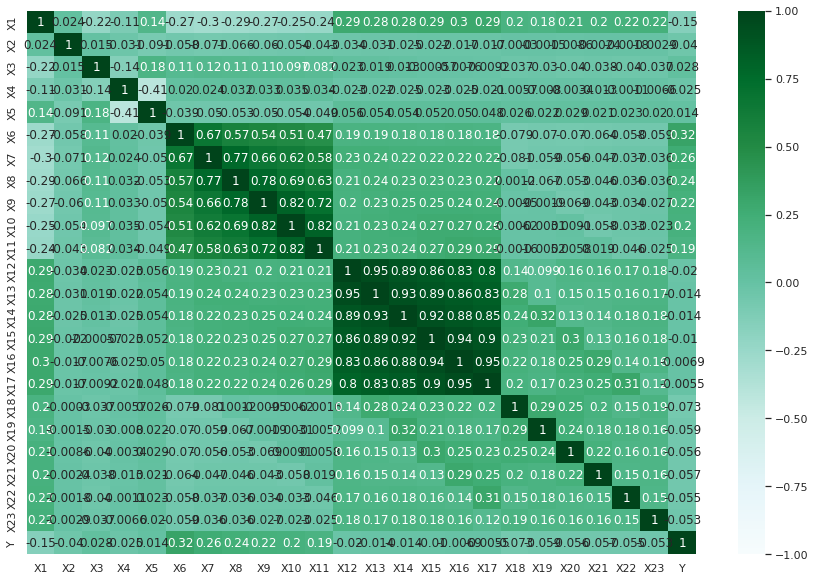

In [9]:
mat_corr = dfCreditosNro.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(mat_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

---
✅ **CONCLUSIONES PRELIMINARES:**

---
De acuerdo al análisis que arroja la gráfica anterior podemos concluir que las variables X12 y X13, X13 y X14, X14 y X15, X15 y X16, y X16 y X17 tienen fuerte correlación, caso similar (pero en menor medida) a lo que ocurre con las variables X6 y X7, X7 y X8, X8 y X9, X9 y X10, y X10 y X11. Con el fin de que el ejercicio nos brinde herramientas de análisis manejables, seleccionaremos los atributos X5, X12, X13, X16 y  X17 para aplicar la técnica de preprocesamiento PCA. Pero antes, normalizaremos los datos para que podamos realizar un mejor análisis de los rangos y la varianza.

In [15]:
from sklearn.preprocessing import StandardScaler

var_normal_credit = StandardScaler()
normalizado_credit = var_normal_credit.fit_transform(dfCreditosNro)

dfCreditosNroEscalado=pd.DataFrame(normalizado_credit, columns=dfCreditosNro.columns)

dfCreditosNroEscalado.head()

X1        X2        X3        X4        X5        X6        X7  \
0 -1.137363  0.809689  0.185849 -1.057086 -1.246282  1.794642  1.782583   
1 -0.366561  0.809689  0.185849  0.858831 -1.029224 -0.874468  1.782583   
2 -0.597802  0.809689  0.185849  0.858831 -0.160996  0.015235  0.111950   
3 -0.906122  0.809689  0.185849 -1.057086  0.164590  0.015235  0.111950   
4 -0.906122 -1.235043  0.185849 -1.057086  2.335161 -0.874468  0.111950   

         X8        X9       X10  ...       X15       X16       X17       X18  \
0 -0.696680 -0.666630 -1.530700  ... -0.672419 -0.663031 -0.652714 -0.341890   
1  0.139436  0.189241  0.235635  ... -0.621583 -0.606229 -0.597982 -0.341890   
2  0.139436  0.189241  0.235635  ... -0.449762 -0.417277 -0.391745 -0.250270   
3  0.139436  0.189241  0.235635  ... -0.232512 -0.186929 -0.156808 -0.221179   
4 -0.696680  0.189241  0.235635  ... -0.347080 -0.348260 -0.331626 -0.221179   

        X19       X20       X21       X22       X23         Y  
0 -0.227134 -0.296782 -0.308107 -0.314124 -0.293485  1.876689  
1 -0.213645 -0.240019 -0.244315 -0.314124 -0.181054  1.876689  
2 -0.191958 -0.240019 -0.244315 -0.248702 -0.012407 -0.532853  
3 -0.169448 -0.228667 -0.237936 -0.244188 -0.237269 -0.532853  
4  1.333962  0.270850  0.266021 -0.269048 -0.255314 -0.532853  

[5 rows x 24 columns]

In [22]:
#Guardamos en la variable AtributosPCA las columnas a considerar en la técnica PCA
AtributosPCA = ["X5", "X12", "X13", "X16", "X17"]

MiResumen = {"Varianzas": dfCreditosNroEscalado[AtributosPCA].var()[0:5], "Rango Minimo": dfCreditosNroEscalado[AtributosPCA].min()[0:5], "Rango Máximo": dfCreditosNroEscalado[AtributosPCA].max()[0:5]}

#Almacenamos la información en un dataframe para mejor visualización
pd.DataFrame(MiResumen, index = AtributosPCA).transpose()

X5        X12        X13        X16        X17
Varianzas     1.000033   1.000033   1.000033   1.000033   1.000033
Rango Minimo -1.571867  -2.943086  -1.670797  -2.000207  -6.352483
Rango Máximo  4.722789  12.396047  13.126386  14.580173  15.487493

---
⚠ **APLICAR TÉCNICA PCA:**

---
Una vez normalizados los datos, procederemos a aplicar la técnica PCA a los atributos seleccionados del modelo.

In [23]:
from sklearn.decomposition import PCA

Componentes = PCA()

ComponentesResult = Componentes.fit_transform(dfCreditosNroEscalado)

ComponentesResult[:5]

array([[-1.80075257e+00, -1.27254697e+00, -5.88668173e-01,
        -3.97486234e-01, -1.02212350e-01, -1.60908785e+00,
         2.69738750e+00,  1.16763368e-01, -5.27318475e-01,
        -2.13737538e-01, -1.85834593e-01, -7.76028724e-02,
         2.29608840e+00, -9.00374365e-01, -3.12166809e-01,
        -1.39714869e-01,  4.03765201e-01, -2.68693492e-01,
        -8.85436715e-01,  5.89593276e-01, -4.57709806e-02,
         1.62799580e-02,  1.61306013e-02,  1.04888517e-02],
       [-6.70128172e-01, -2.40841090e+00,  1.04215858e+00,
        -3.56008646e-01,  3.04660115e-01, -9.70705163e-01,
         7.85497461e-01,  2.88934808e-01, -9.72988659e-02,
        -1.59360991e-01,  1.13127251e-01,  1.62825120e-01,
        -1.39269230e+00, -1.19997970e-01, -2.90577553e-01,
         6.44311226e-01,  2.11754351e+00,  2.02549954e-02,
        -2.59164244e-01,  8.30495785e-01, -1.24408054e-01,
         4.01697655e-03,  3.05488286e-03,  6.46900713e-03],
       [-8.57916353e-01, -9.71228390e-01,  4.71521931e

ℹ **NOTA:** Para que podamos comprender mejor los resultados del PCA aplicado anteriormente, obtendremos a continuación la varianza acumulada por cada componente obtenido.

In [25]:
ComponentesExplicadosDF = pd.DataFrame({'% Varianza del componente': np.round(Componentes.explained_variance_ratio_,4) * 100, '% Varianza acumulada': np.cumsum(Componentes.explained_variance_ratio_) * 100
})
ComponentesExplicadosDF

% Varianza del componente  % Varianza acumulada
0                       27.30             27.301007
1                       17.50             44.806002
2                        6.47             51.276642
3                        6.14             57.421529
4                        4.34             61.758495
5                        4.06             65.817036
6                        3.82             69.632496
7                        3.78             73.412725
8                        3.69             77.105833
9                        3.63             80.736255
10                       3.26             83.998495
11                       3.05             87.049794
12                       2.61             89.664670
13                       2.37             92.037708
14                       2.19             94.223462
15                       1.66             95.881164
16                       1.08             96.962519
17                       1.04             97.999452
18                       0.79             98.786146
19                       0.55             99.335728
20                       0.29             99.627978
21                       0.17             99.797881
22                       0.11             99.903250
23                       0.10            100.000000



---


💡**Resultados:** Observamos que utilizando los primeros **13 componentes**, ya estaríamos obteniendo una varianza del **90%**, por lo cual estaríamos reduciendo casi a la mitad la carga de procesamiento del modelo.

---



---


👐Ahora debemos validar que una vez aplicada la técnica PCA no se haya presentado perdida de información, por lo cual, comparamos la varianza obtenida para las variables iniciales versus la varianza obtenida después de aplicar la técnica PCA.


---

In [27]:
dfCreditosNroEscaladoResult = pd.DataFrame(ComponentesResult)
print("Varianza total variables originales: ", dfCreditosNroEscalado.var().sum())
print("Varianza total de los componentes: ", dfCreditosNroEscaladoResult.var().sum())

Varianza total variables originales:  24.000801148312583
Varianza total de los componentes:  24.0008011483126


---


💡**Resultados:** Observamos que la varianza total de las variables iniciales (**24.000801148312583**) es técnicamente igual a la varianza total de los componentes generados (**24.0008011483126**) al aplicar PCA.

---


In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

⚠ Eliminaremos las columnas en las que exista por lo menos un dato faltante:

In [ ]:
ndf.dropna(axis = 1, inplace = True)
ndf

X1
ID           
1       20000
2      120000
3       90000
4       50000
5       50000
...       ...
29996  220000
29997  150000
29998   30000
29999   80000
30000   50000

[30000 rows x 1 columns]

**Resultado:** Tal como lo comentamos en la parte superior, la única columna que no tiene datos faltantes es la X1, por ende, esta fue la única que dejó la aplicación de esta técnica.

ℹ Ahora reiniciamos el nuevo dataframe al que le seguiremos aplicando las otras técnicas.

In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

⚠ Ahora vamos a eliminar todos aquellos registros (filas) en los que todos los datos estén perdidos para sus columnas.

In [ ]:
ndf.dropna(how='all', inplace = True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

**Resultado:** En el set de datos no existe ningún registro con el total de datos faltantes, por lo cual no se generó cambio con esta técnica.

ℹ Ahora reiniciamos el nuevo dataframe al que le seguiremos aplicando las otras técnicas.

In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

⚠ Ahora utilizaremos una técnica con umbrales, en la cual solicitaremos que mantenga aquellos registros en los que hay menos de 4 datos NAN.

In [ ]:
ndf.dropna(thresh=4, inplace = True)

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[29999 rows x 24 columns]

**Resultado:** Eliminó un registro del set de datos teniendo en cuenta el valor del umbral.

ℹ Ahora reiniciamos el nuevo dataframe al que le seguiremos aplicando las otras técnicas.

In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

⚠ Aplicaremos la misma técnica con el umbral, pero ahora utilizaremos el valor de 5.

In [ ]:
ndf.dropna(thresh = 5,  #if there is not 5 nan values, the column will be eliminated 
           axis = 1, 
           inplace = True
           ) 
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

**Resultado:** No se encontraron registros que cumplieran los criterios dados.

ℹ Hasta aquí aplicamos la solución 1.

---


---
✅ **SOLUCIONES:**

---
2. Ahora vamos a aplicar la sustitución media.


In [ ]:
ndf = df.copy()

ℹ Obtenemos el promedio de la columna X7 y tomamos ese valor para llenar los datos faltantes dentro del set de datos en esa misma columna.

In [ ]:
wm = ndf.X7.mean()
wm

-0.13368894815802634

In [ ]:
ndf['X7'].fillna(value = wm, 
                    inplace = True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Realizamos el mismo proceso, pero ahora con la mediana.

In [ ]:
ndf['X7'].fillna(value = ndf.X7.median(), 
                    inplace = True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Realizamos el mismo proceso, pero teniendo en cuenta que no tenemos datos categóricos, haremos el ejercicio de la moda para el dato de la columna X3 (Education).

In [ ]:
mm  = ndf.X3.mode()
mm

0    2.0
dtype: float64

In [ ]:
mm[0]

2.0

In [ ]:
ndf['X3'].fillna(value = mm[0], 
                    inplace = True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

**Resultado:** Aunque no nos generó efectos en el modelo de datos, nos permitió saber como aplicar la técnica del ajuste en los datos faltantes utilizando la moda.

In [ ]:
ndf.isnull().values.any()

True

In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Ahora vamos a imputar columnas particulares.

In [ ]:
ndf.dropna(subset=['X3', 'X7'], inplace = True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[29995 rows x 24 columns]

In [ ]:
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Ahora vamos a llenar los datos faltantes en cada celda de las columna X3 (Education) y X7 con nuestras estrategias seleccionadas.

In [ ]:
ndf.X3.mode()[0]

2.0

In [ ]:
favs = {'X3': ndf.X3.mode()[0], 'X7': ndf['X7'].mean()}

ℹ Le asignamos a los datos faltantes de X3 (Education) la moda que seleccionamos y en X7 el promedio de la columna.

In [ ]:
ndf.X3.fillna(ndf.X3.mode()[0], inplace=True)
ndf.X7.fillna(ndf.X7.mean(), inplace=True)
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

---
✅ **SELECCIONAR COLUMNAS DE BASE DE DATO:**

---

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
ndf = df.copy()
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Obtenemos los encabezados y posteriormente hacemos lo mismo pero ordenándolos.

In [ ]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
ndf.columns.sort_values()

Index(['X1', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'Y'],
      dtype='object')

ℹ Obtenemos desde la fila 2 hasta la 5 y desde la columna X1 hasta la X5 con la función "loc".

In [ ]:
ndf.loc[2:5 , 'X1':'X5']

X1   X2   X3   X4    X5
ID                             
2   120000  2.0  2.0  2.0  26.0
3    90000  2.0  2.0  2.0  34.0
4    50000  2.0  2.0  1.0  37.0
5    50000  1.0  2.0  1.0  57.0

ℹ Almacenamos las columnas X3, X4 y X5 como favoritas y posteriormente ejecutamos la función "loc" pero ahora mandándole la lista con las columnas almacenadas.

In [ ]:
favs = ['X3', 'X4', 'X5']

In [ ]:
ndf.loc[2:5 , favs]

X3   X4    X5
ID                
2   2.0  2.0  26.0
3   2.0  2.0  34.0
4   2.0  1.0  37.0
5   2.0  1.0  57.0

ℹ Hacemos la misma selección anterior pero ahora utilizando la función "iloc" con los indices de las columnas.

In [ ]:
ndf.iloc[1:5, [2,3, 4]]

X3   X4    X5
ID                
2   2.0  2.0  26.0
3   2.0  2.0  34.0
4   2.0  1.0  37.0
5   2.0  1.0  57.0

ℹ Seleccionamos las columnas del dataframe y posteriormente las imprimimos mediante un ciclo for.

In [ ]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
for i in ndf.columns:
  print(i)

X1
X2
X3
X4
X5
X6
X7
X8
X9
X10
X11
X12
X13
X14
X15
X16
X17
X18
X19
X20
X21
X22
X23
Y


ℹ Obtenemos los primeros 5 registros de nuestro dataframe.

In [ ]:
ndf.head(4)

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                        ...            
1    20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2   120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3    90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4    50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   

        X16      X17     X18     X19     X20     X21     X22     X23    Y  
ID                                                                         
1       0.0      0.0     0.0   689.0     0.0     0.0     0.0     0.0  1.0  
2    3455.0   3261.0     0.0  1000.0  1000.0  1000.0     0.0  2000.0  1.0  
3   14948.0  15549.0  1518.0  1500.0  1000.0  1000.0  1000.0  5000.0  0.0  
4   28959.0  29547.0  2000.0  2019.0  1200.0  1100.0  1069.0  1000.0  0.0  

[4 rows x 24 columns]

ℹ Traemos los valores únicos de la columna X3 (Education) 

In [ ]:
ndf.X3.unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  0., nan])

ℹ Contamos el número de elementos agrupados por las columnas X3 y X7. Lo hacemos primero utilizando el método "size()" y posteriormente con el método "value_counts()".

In [ ]:
df.groupby(['X3', 'X7']).size()

X3   X7  
0.0  -2.0       4
     -1.0       6
      0.0       4
1.0  -2.0    1898
     -1.0    2950
      0.0    4584
      1.0       8
      2.0    1052
      3.0      70
      4.0      14
      5.0       3
      6.0       1
      7.0       4
2.0  -2.0    1334
     -1.0    2189
      0.0    8134
      1.0      18
      2.0    2073
      3.0     179
      4.0      65
      5.0      15
      6.0       9
      7.0      12
3.0  -2.0     467
     -1.0     828
      0.0    2722
      1.0       2
      2.0     786
      3.0      77
      4.0      19
      5.0       7
      6.0       2
      7.0       4
      8.0       1
4.0  -2.0      31
     -1.0      35
      0.0      56
      2.0       1
5.0  -2.0      42
     -1.0      31
      0.0     193
      2.0      13
      4.0       1
6.0  -2.0       6
     -1.0       8
      0.0      35
      2.0       2
dtype: int64

In [ ]:
df[['X3', 'X7']].value_counts()

X3   X7  
2.0   0.0    8134
1.0   0.0    4584
     -1.0    2950
3.0   0.0    2722
2.0  -1.0    2189
      2.0    2073
1.0  -2.0    1898
2.0  -2.0    1334
1.0   2.0    1052
3.0  -1.0     828
      2.0     786
     -2.0     467
5.0   0.0     193
2.0   3.0     179
3.0   3.0      77
1.0   3.0      70
2.0   4.0      65
4.0   0.0      56
5.0  -2.0      42
6.0   0.0      35
4.0  -1.0      35
     -2.0      31
5.0  -1.0      31
3.0   4.0      19
2.0   1.0      18
      5.0      15
1.0   4.0      14
5.0   2.0      13
2.0   7.0      12
      6.0       9
1.0   1.0       8
6.0  -1.0       8
3.0   5.0       7
6.0  -2.0       6
0.0  -1.0       6
     -2.0       4
3.0   7.0       4
1.0   7.0       4
0.0   0.0       4
1.0   5.0       3
3.0   6.0       2
      1.0       2
6.0   2.0       2
3.0   8.0       1
4.0   2.0       1
5.0   4.0       1
1.0   6.0       1
dtype: int64

---
✅ **ELIMINAR Y CAMBIAR NOMBRES DE COLUMNAS DE BASE DE DATO:**

---

In [ ]:
ndf

X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 24 columns]

ℹ Creamos una copia del dataframe y eliminamos en esta las columnas X2 y X5.

In [ ]:
ndf2 = ndf.drop(['X2', 'X5',], axis = 1)
ndf2

X1   X3   X4   X6   X7   X8   X9  X10  X11       X12  ...      X15  \
ID                                                               ...            
1       20000  2.0  1.0  2.0  2.0 -1.0 -1.0 -2.0 -2.0    3913.0  ...      0.0   
2      120000  2.0  2.0 -1.0  2.0  0.0  0.0  0.0  2.0    2682.0  ...   3272.0   
3       90000  2.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   29239.0  ...  14331.0   
4       50000  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   46990.0  ...  28314.0   
5       50000  2.0  1.0 -1.0  0.0 -1.0  0.0  0.0  0.0    8617.0  ...  20940.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...      ...   
29996  220000  3.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  188948.0  ...  88004.0   
29997  150000  3.0  2.0 -1.0 -1.0 -1.0 -1.0  0.0  0.0    1683.0  ...   8979.0   
29998   30000  2.0  2.0  4.0  3.0  2.0 -1.0  0.0  0.0    3565.0  ...  20878.0   
29999   80000  3.0  1.0  1.0 -1.0  0.0  0.0  0.0 -1.0   -1645.0  ...  52774.0   
30000   50000  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   47929.0  ...  36535.0   

           X16      X17      X18      X19      X20     X21      X22     X23  \
ID                                                                            
1          0.0      0.0      0.0    689.0      0.0     0.0      0.0     0.0   
2       3455.0   3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0   
3      14948.0  15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0   
4      28959.0  29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0   
5      19146.0  19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0   
...        ...      ...      ...      ...      ...     ...      ...     ...   
29996  31237.0  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0   
29997   5190.0      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0   
29998  20582.0  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0   
29999  11855.0  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0   
30000  32428.0  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0   

         Y  
ID          
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  
...    ...  
29996  0.0  
29997  0.0  
29998  1.0  
29999  1.0  
30000  1.0  

[30000 rows x 22 columns]

ℹ Renombramos las columnas X3 y X4 con sus nombres originales en el dataset, "Education" y "Marital status" respectivamente.

In [ ]:
ndf2.rename(columns = {'X3' : 'Education', 'X4': 'Marital status'}, inplace = True)
ndf2

X1  Education  Marital status   X6   X7   X8   X9  X10  X11  \
ID                                                                       
1       20000        2.0             1.0  2.0  2.0 -1.0 -1.0 -2.0 -2.0   
2      120000        2.0             2.0 -1.0  2.0  0.0  0.0  0.0  2.0   
3       90000        2.0             2.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       50000        2.0             1.0  0.0  0.0  0.0  0.0  0.0  0.0   
5       50000        2.0             1.0 -1.0  0.0 -1.0  0.0  0.0  0.0   
...       ...        ...             ...  ...  ...  ...  ...  ...  ...   
29996  220000        3.0             1.0  0.0  0.0  0.0  0.0  0.0  0.0   
29997  150000        3.0             2.0 -1.0 -1.0 -1.0 -1.0  0.0  0.0   
29998   30000        2.0             2.0  4.0  3.0  2.0 -1.0  0.0  0.0   
29999   80000        3.0             1.0  1.0 -1.0  0.0  0.0  0.0 -1.0   
30000   50000        2.0             1.0  0.0  0.0  0.0  0.0  0.0  0.0   

            X12  ...      X15      X16      X17      X18      X19      X20  \
ID               ...                                                         
1        3913.0  ...      0.0      0.0      0.0      0.0    689.0      0.0   
2        2682.0  ...   3272.0   3455.0   3261.0      0.0   1000.0   1000.0   
3       29239.0  ...  14331.0  14948.0  15549.0   1518.0   1500.0   1000.0   
4       46990.0  ...  28314.0  28959.0  29547.0   2000.0   2019.0   1200.0   
5        8617.0  ...  20940.0  19146.0  19131.0   2000.0  36681.0  10000.0   
...         ...  ...      ...      ...      ...      ...      ...      ...   
29996  188948.0  ...  88004.0  31237.0  15980.0   8500.0  20000.0   5003.0   
29997    1683.0  ...   8979.0   5190.0      0.0   1837.0   3526.0   8998.0   
29998    3565.0  ...  20878.0  20582.0  19357.0      0.0      0.0  22000.0   
29999   -1645.0  ...  52774.0  11855.0  48944.0  85900.0   3409.0   1178.0   
30000   47929.0  ...  36535.0  32428.0  15313.0   2078.0   1800.0   1430.0   

          X21      X22     X23    Y  
ID                                   
1         0.0      0.0     0.0  1.0  
2      1000.0      0.0  2000.0  1.0  
3      1000.0   1000.0  5000.0  0.0  
4      1100.0   1069.0  1000.0  0.0  
5      9000.0    689.0   679.0  0.0  
...       ...      ...     ...  ...  
29996  3047.0   5000.0  1000.0  0.0  
29997   129.0      0.0     0.0  0.0  
29998  4200.0   2000.0  3100.0  1.0  
29999  1926.0  52964.0  1804.0  1.0  
30000  1000.0   1000.0  1000.0  1.0  

[30000 rows x 22 columns]


---

### **3ra Parte:** Preparación de los datos


---


*¿Qué datos considero mas importantes? ¿Por qué?*

**Los datos contenidos en las columnas X6, X7, X8, X9, X10 y X11, ya que corresponden a la edad de la cartera reflejando el estado de la mora en el pago para los clientes evaluados, lo que los convierte en atributos decisivos para obtener un desempeño alto en los indicadores de predicción del modelo.**


*¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?*

**Sí, se realizaron las dos actividades, comenzamos eliminando los registros con datos faltantes (dropna(inplace = True)), posteriormente probamos eliminando las columnas que tuviesen datos faltantes (ndf.dropna(axis = 1, inplace = True)) pero teniendo en cuenta que todas las columnas (excepto la X1) presentaban datos faltantes, solo nos dejó una columna para trabajar, lo cual obviamente no es práctico para generar el modelo, al final probamos la eliminación de registros utilizando umbrales, pero en realidad no tuvimos mucha mejora en la calidad de los datos. Una vez validamos las técnicas de eliminación pasamos a las técnicas de imputación, en las cuales tomamos la columna X7 (numérica) y probamos ajustando los valores faltantes con el promedio y posteriormente con la mediana del campo, finalmente intentamos aplicar la moda pero al no contar con datos categóricos en el modelo no pudimos validar el efecto de esta técnica en la depuración de los datos.**

¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?

**Sí, es necesario limpiar el conjunto, ya que se evidencia que la mayoría de las columnas presentan ausencia de datos, para ello utilizamos la función (isnull().any()) que nos permite analizar los datos faltantes en el conjunto. Es clave realizar esta limpieza ya que no hacerlo impactará las predicciones arrojadas por el modelo de aprendizaje automático al tener registros con ausencia de datos que no son numéricamente tratables, por lo cual debemos garantizar que los datos sean confiables y útiles para el modelo a desarrollar.**

¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.

**Teniendo en cuenta el conjunto de datos utilizado, no se encontraron inconvenientes de formato, ya que el tipo de datos había sido transformado, incluso aquellos campos categóricos como el género, el estado civil y la educación habían sido previamente transformados a numéricos, por lo cual, toda la información a gestionar se encontraba normalizada.**

¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?

**Tal como lo comentamos en la segunda pregunta, probamos varios ajustes, pero todos relacionados con técnicas de eliminación a nivel de filas y columnas, y modificación de datos faltantes, realizando imputación la mediana y el promedio en los campos faltantes de columnas numéricas.**
